<a href="https://colab.research.google.com/github/gayathrig21/EDA-on-Credit-Card-Data/blob/main/EDA_on_Credit_Card_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)
pd.set_option("display.width",1000)

Connecting to Kaggle using api and downloading the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!pwd

/content


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [6]:
!kaggle competitions download -c home-credit-default-risk

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!chmod 600 /content/kaggle.json

Unzipping the downloaded folder

In [8]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import patoolib

In [10]:
patoolib.extract_archive('home-credit-default-risk.zip')

patool: Extracting home-credit-default-risk.zip ...
patool: running /usr/bin/7z x -o./Unpack_8n3ngmqh -- home-credit-default-risk.zip
patool: ... home-credit-default-risk.zip extracted to `home-credit-default-risk1' (multiple files in root).


'home-credit-default-risk1'

Reading the downloaded .csv file and storing it in dataframes.

Here we are using only 2 datasets application_train.csv and previous_application.csv

In [11]:
new_credit=pd.read_csv('home-credit-default-risk/application_train.csv')
prev_credit=pd.read_csv('home-credit-default-risk/previous_application.csv')

Analysing basic information from the dataframes

In [12]:
new_credit.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
new_credit.shape

(307511, 122)

In [14]:
new_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [15]:
new_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [16]:
new_credit.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [17]:
prev_credit.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [18]:
prev_credit.shape

(1670214, 37)

In [19]:
prev_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Checking if Null values are present in new_credit dataset

In [20]:
new_credit.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

Checking the percentage of missing values such that it can be dropped if there are more null values

In [21]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

Dropped all the columns which has more than 45 % of null data. 

(Syntax : Take all the rows and keep only the columns which has less than 45 % of null values)

In [22]:
new_credit=new_credit.loc[:,new_credit.isnull().mean()<=0.45]

Columns dropped from 122 to 73

In [23]:
new_credit.shape

(307511, 73)

Remaining columns that have null values. we need to treat the missing values

In [24]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

Treat column OCCUPATION_TYPE for missing value

In [25]:
new_credit['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [26]:
new_credit['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
new_credit['OCCUPATION_TYPE'].isnull().sum()

96391

The highest mode for OCCUPATION_TYPE column is "Laborers"  but it might not be fair to impute such high number of missing values 96391 with "Laborers" 

Alternatively we can impute with "Unknown" for the missing values

In [28]:
new_credit['OCCUPATION_TYPE'].replace(np.NAN,"Unknown", inplace=True)

In [29]:
new_credit['OCCUPATION_TYPE'].isnull().sum()

0

In [30]:
new_credit['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Dropping the columns that are not required

In [31]:
not_required=['FLAG_DOCUMENT_21','FLAG_DOCUMENT_20','FLAG_DOCUMENT_19','FLAG_DOCUMENT_18','FLAG_DOCUMENT_17',
              'FLAG_DOCUMENT_16','FLAG_DOCUMENT_15','FLAG_DOCUMENT_14','FLAG_DOCUMENT_13','FLAG_DOCUMENT_12',
              'FLAG_DOCUMENT_11','FLAG_DOCUMENT_10','FLAG_DOCUMENT_9','FLAG_DOCUMENT_8','FLAG_DOCUMENT_7',
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_5','FLAG_DOCUMENT_4','FLAG_DOCUMENT_3','FLAG_DOCUMENT_2',
              'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
              'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

In [32]:
new_credit.drop(columns=not_required, axis=1 , inplace=True)

In [33]:
new_credit.shape

(307511, 43)

In [34]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
NAME_TYPE_SUITE                 0.42
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
HOUR_APPR_PROCESS_START         0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
FLAG_WORK_PHONE                 0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
FLAG_CONT_MOBILE                0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
F

Treating column EXT_SOURCE_3 and EXT_SOURCE_2 for missing values.

Box plot for checking the outliers

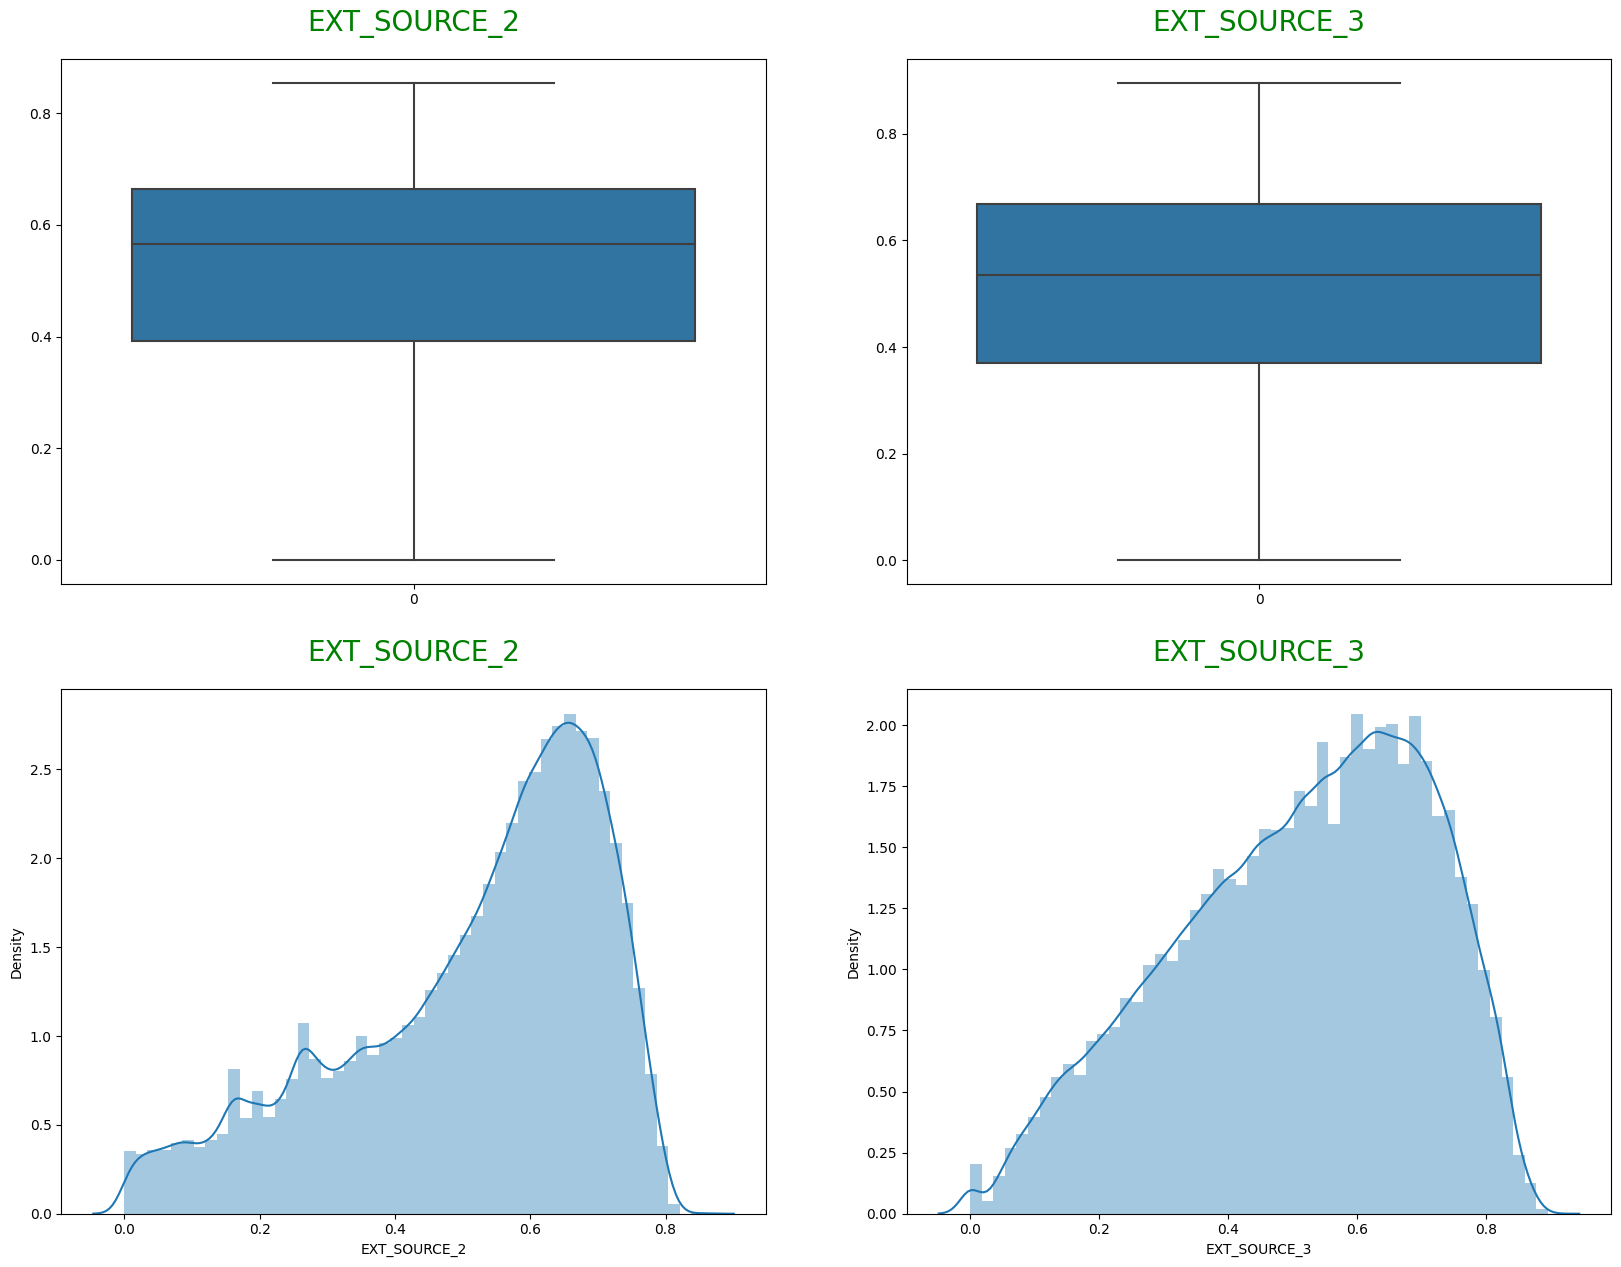

In [35]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
sns.boxplot(new_credit['EXT_SOURCE_2']).set_title("EXT_SOURCE_2", fontsize=20 , color="Green", pad=20)

plt.subplot(2,2,2)
sns.boxplot(new_credit['EXT_SOURCE_3']).set_title("EXT_SOURCE_3", fontsize=20 , color="Green", pad=20)

plt.subplot(2,2,3)
sns.distplot(new_credit['EXT_SOURCE_2']).set_title("EXT_SOURCE_2", fontsize=20 , color="Green", pad=20)

plt.subplot(2,2,4)
sns.distplot(new_credit['EXT_SOURCE_3']).set_title("EXT_SOURCE_3", fontsize=20 , color="Green", pad=20)

plt.show()

Box plot shows that there are no outliers but there is some skewness in EXT_SOURCE_2

Impute the values with Median

In [36]:
for column in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
  new_credit[column].fillna(new_credit[column].median, inplace=True)

In [37]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,2).sort_values(ascending=False)

NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
REG_REGION_NOT_LIVE_REGION     0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
SK_ID_CURR                     0.00
FLAG_WORK_PHONE                0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.00
EXT_SOURCE_3                   0.00
FLAG_CONT_MOBILE               0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                

Treating "AMT_GOODS_PRICE" column

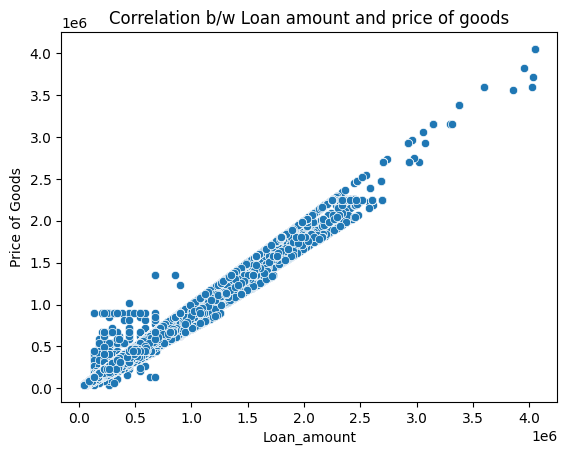

In [38]:
sns.scatterplot(x=new_credit['AMT_CREDIT'] , y=new_credit['AMT_GOODS_PRICE'], data=new_credit)
plt.title("Correlation b/w Loan amount and price of goods")
plt.xlabel("Loan_amount")
plt.ylabel("Price of Goods")
plt.show()

Scatter plot shows that there is high positive correlation . 

Impute the "AMT_GOODS_PRICE" with the value of "AMT_CREDIT 

In [39]:
new_credit['AMT_GOODS_PRICE']=np.where(new_credit['AMT_GOODS_PRICE'].isnull()==True, new_credit['AMT_CREDIT'], new_credit['AMT_GOODS_PRICE'])

In [40]:
new_credit['AMT_GOODS_PRICE'].isnull().sum()

0

In [41]:
new_credit['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
new_credit['NAME_TYPE_SUITE'].isnull().sum()

1292

Very less missing data in "NAME_TYPE_SUITE" column . Hence can be imputed with mode

In [43]:
new_credit['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [44]:
new_credit['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [45]:
new_credit['NAME_TYPE_SUITE'].fillna(new_credit['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [46]:
new_credit['NAME_TYPE_SUITE'].isnull().sum()

0

Checking with 4 places of decimals , we see some more columns which has a very small percentage of missing values. We can replace with median as this is a very large dataset

In [47]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,4).sort_values(ascending=False)

AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
HOUR_APPR_PROCESS_START        0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE                     0.0000
FLAG_EMAIL                     0.0000
OCCUPATION_TYPE                0.0000
REGION_RATING_CLIENT           0.0000
REGION_RATING_CLIENT_W_CITY    0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
FLAG_EMP_PHONE                 0.0000
REG_REGION_NOT_WORK_REGION     0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
REG_CITY_NOT_WORK_CITY         0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
ORGANIZATION_TYPE              0.0000
EXT_SOURCE_2                   0.0000
EXT_SOURCE_3                   0.0000
FLAG_WORK_PHONE                0.0000
SK_ID_CURR                     0.0000
TARGET                         0.0000
DAYS_ID_PUBLISH                0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER 

In [48]:
null_cols =['AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

In [49]:
for column in null_cols:
  new_credit[column].fillna(new_credit[column].median(), inplace=True)

In [50]:
round((new_credit.isnull().sum()/new_credit.shape[0])*100,4).sort_values(ascending=False)

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
REG_REGION_NOT_LIVE_REGION     0.0
FLAG_EMP_PHONE                 0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_WORK_PHONE                0.0
FLAG_MOBIL                     0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN        

Now there are no missing data in the  new_credit dataframe

In [51]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 